In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [2]:
df= pd.read_csv('wine.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
plt.rcParams['figure.figsize']=(10,5)

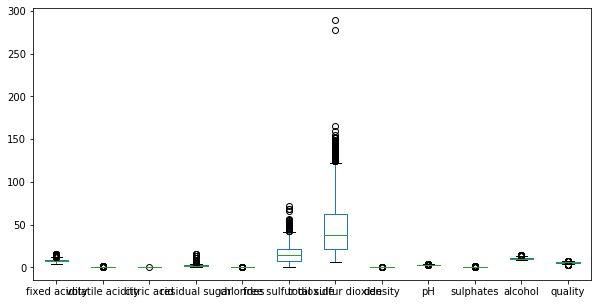

In [6]:
df.plot.box()

In [7]:
from scipy.stats import zscore

In [8]:
z=np.abs(zscore(df))

In [9]:
df_z=df[(z<3).all(axis=1)]

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df_z.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


In [12]:
df_z.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [13]:
df_z.shape

(1451, 12)

In [14]:
df.shape

(1599, 12)

In [15]:
df.shape

(1599, 12)

In [16]:
list=np.arange(0,100)

In [42]:
svm=SVC(kernel='rbf')

In [99]:
dtc=DecisionTreeClassifier(criterion='entropy')

In [97]:
knn=KNeighborsClassifier(25)

In [43]:
x=np.sqrt(df_z.iloc[:,0:-1])

In [44]:
x.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [45]:
y=df_z.iloc[:,-1].values.reshape(-1,1)

In [46]:
df_z.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [47]:
x.shape

(1451, 11)

In [48]:
y.shape

(1451, 1)

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
for m in list:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=25,random_state=m)
    svm.fit(xtrain,ytrain)
    pred=svm.predict(xtest)
    print('accuracy score is :', m+1, accuracy_score(pred,ytest))

accuracy score is : 1 0.52
accuracy score is : 2 0.6
accuracy score is : 3 0.56
accuracy score is : 4 0.64
accuracy score is : 5 0.48
accuracy score is : 6 0.56
accuracy score is : 7 0.4
accuracy score is : 8 0.56
accuracy score is : 9 0.56
accuracy score is : 10 0.56
accuracy score is : 11 0.56
accuracy score is : 12 0.6
accuracy score is : 13 0.56
accuracy score is : 14 0.6
accuracy score is : 15 0.52
accuracy score is : 16 0.44
accuracy score is : 17 0.52
accuracy score is : 18 0.56
accuracy score is : 19 0.68
accuracy score is : 20 0.44
accuracy score is : 21 0.76
accuracy score is : 22 0.44
accuracy score is : 23 0.56
accuracy score is : 24 0.68
accuracy score is : 25 0.6
accuracy score is : 26 0.52
accuracy score is : 27 0.6
accuracy score is : 28 0.44
accuracy score is : 29 0.6
accuracy score is : 30 0.68
accuracy score is : 31 0.4
accuracy score is : 32 0.64
accuracy score is : 33 0.64
accuracy score is : 34 0.48
accuracy score is : 35 0.4
accuracy score is : 36 0.64
accuracy s

In [85]:
for m in list:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=21,random_state=m)
    dtc.fit(xtrain,ytrain)
    pred=dtc.predict(xtest)
    ascore=accuracy_score(pred,ytest)
    if ascore>0.9:
        print(m,ascore)


17 0.9047619047619048


In [80]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=21,random_state=17)
dtc.fit(xtrain,ytrain)
pred=dtc.predict(xtest)
print('accuracy score is :', accuracy_score(pred,ytest))

accuracy score is : 0.9523809523809523


In [98]:
for m in list:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=25,random_state=m)
    knn.fit(xtrain,ytrain)
    pred=knn.predict(xtest)
    ascore=accuracy_score(pred,ytest)
    if ascore>0.8:
        print(m,ascore)

In [103]:
for m in list:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=21,random_state=m)
    dtc.fit(xtrain,ytrain)
    pred=dtc.predict(xtest)
    ascore=accuracy_score(pred,ytest)
    if ascore>0.9:
        print(m,ascore)

43 0.9523809523809523


In [104]:
from sklearn.model_selection import GridSearchCV
crit={'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
grid=GridSearchCV(estimator=dtc,param_grid=crit,cv=14,scoring='accuracy')
grid.fit(xtrain,ytrain)

GridSearchCV(cv=14, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,

In [106]:
predict=grid.predict(xtest)

In [107]:
accuracy_score(predict,ytest)

0.5238095238095238

In [108]:
grid.best_score_

0.6454545454545455